In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Chisom dataset(1).xlsx')

In [3]:
df.head()

,Plants,Weeks,Height,Length (leaf),Width (leaf),Nitrogen (mg/kg),Phosphorus (mg/kg),potassium (mg/kg),Soil moisture (%),pH,Temperature (?),Humidity (%),yield
0,plant1,Week 1,9.0,NaN,NaN,40.0,132.0,48.0,58.0,6.8,28.0,93.0,yes
1,plant1,Week 2,10.0,5.3,2.5,39.0,68.0,47.0,57.0,6.8,27.0,100.0,yes
2,plant1,Week 3,18.0,7.5,3.9,42.0,132.0,50.0,81.0,6.8,34.0,65.0,yes
3,plant1,Week 4,20.0,9.0,5.0,31.0,68.0,39.0,59.0,6.8,33.0,97.0,yes
4,plant1,Week 5,28.0,12.0,5.5,25.0,68.0,33.0,30.0,6.9,36.0,37.0,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Plants              350 non-null    object 
 1   Weeks               350 non-null    object 
 2   Height              332 non-null    float64
 3   Length (leaf)       297 non-null    float64
 4   Width (leaf)        296 non-null    float64
 5   Nitrogen (mg/kg)    331 non-null    float64
 6   Phosphorus (mg/kg)  331 non-null    float64
 7   potassium (mg/kg)   331 non-null    float64
 8   Soil moisture (%)   332 non-null    float64
 9   pH                  332 non-null    float64
 10  Temperature (?)     327 non-null    float64
 11  Humidity (%)        344 non-null    float64
 12  yield               350 non-null    object 
dtypes: float64(10), object(3)
memory usage: 35.7+ KB


In [5]:
df.describe()

,Height,Length (leaf),Width (leaf),Nitrogen (mg/kg),Phosphorus (mg/kg),potassium (mg/kg),Soil moisture (%),pH,Temperature (?),Humidity (%)
count,332.000000,297.000000,296.000000,331.000000,331.000000,331.000000,332.000000,332.000000,327.000000,344.000000
mean,24.452410,10.421549,5.006757,22.259819,53.646526,32.048338,63.373494,6.948494,30.076453,45.029070
std,10.823808,3.963133,1.810784,14.894341,48.229365,14.084510,15.958754,3.419046,3.341085,38.851204
min,8.000000,3.000000,1.200000,2.000000,2.000000,3.000000,10.000000,6.000000,20.000000,0.000000
25%,15.000000,7.000000,3.500000,7.000000,9.000000,19.000000,57.000000,6.800000,27.000000,5.000000
50%,24.000000,10.500000,5.000000,25.000000,68.000000,33.000000,59.000000,6.800000,29.000000,37.000000
75%,35.000000,14.000000,6.425000,39.000000,68.000000,47.000000,77.000000,6.800000,33.000000,93.000000
max,49.000000,19.700000,12.600000,42.000000,132.000000,58.000000,100.000000,69.000000,38.000000,100.000000


In [6]:
def clean_data(df):
    return (df
            .drop('yield', axis=1)
            .rename(columns= lambda x: x.lower().split(' ')[0])
            .rename(columns={'soil': 'soil_moisture'})
            .assign(weeks= lambda x: x['weeks'].str.extract(r'(\d+)').astype(int))
            .assign(plants = lambda x: x['plants'].str.extract(r'(\d+)').astype(int))
            .dropna(subset=['length', 'width', 'temperature'])
            .fillna(0)
            .astype({'plants': 'category'})
            .reset_index(drop=True)
    )

#clean the data set
clean_data = clean_data(df)

In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   plants         291 non-null    category
 1   weeks          291 non-null    int64   
 2   height         291 non-null    float64 
 3   length         291 non-null    float64 
 4   width          291 non-null    float64 
 5   nitrogen       291 non-null    float64 
 6   phosphorus     291 non-null    float64 
 7   potassium      291 non-null    float64 
 8   soil_moisture  291 non-null    float64 
 9   ph             291 non-null    float64 
 10  temperature    291 non-null    float64 
 11  humidity       291 non-null    float64 
dtypes: category(1), float64(10), int64(1)
memory usage: 26.7 KB


In [99]:
clean_data.head(240)

,plants,weeks,height,length,width,nitrogen,phosphorus,potassium,soil_moisture,ph,temperature,humidity
0,1,2,10.0,5.3,2.5,39.0,68.0,47.0,57.0,6.8,27.0,100.0
1,1,3,18.0,7.5,3.9,42.0,132.0,50.0,81.0,6.8,34.0,65.0
2,1,4,20.0,9.0,5.0,31.0,68.0,39.0,59.0,6.8,33.0,97.0
3,1,5,28.0,12.0,5.5,25.0,68.0,33.0,30.0,6.9,36.0,37.0
4,1,6,30.5,13.0,5.8,3.0,4.0,9.0,39.0,6.9,29.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,28,2,10.0,4.0,2.0,39.0,68.0,47.0,57.0,6.8,27.0,100.0
236,28,3,14.0,5.0,2.7,42.0,132.0,50.0,81.0,6.8,34.0,65.0
237,28,4,15.0,6.0,3.0,31.0,68.0,39.0,59.0,6.8,33.0,97.0
238,28,5,21.0,6.5,3.6,25.0,68.0,33.0,50.0,6.8,36.0,37.0


In [69]:
clean_data.groupby('plants')

/tmp/ipykernel_29347/3836844539.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_data.groupby('plants')


In [61]:
clean_data['nitrogen'] = pd.to_numeric(clean_data["nitrogen"], errors="coerce")
clean_data['phosphorus'] = pd.to_numeric(clean_data["phosphorus"], errors="coerce")
clean_data['potassium'] = pd.to_numeric(clean_data["potassium"], errors="coerce")

In [75]:
sub_df = clean_data[['nitrogen', 'potassium', 'phosphorus']][:5]

In [97]:
np.array(clean_data[clean_data['weeks'] == 10][['nitrogen', 'phosphorus', 'potassium']])

array([[ 5.,  6., 13.],
       [ 5.,  6., 13.],
       [ 5.,  6., 15.],
       [ 6.,  8., 19.],
       [ 7.,  8., 18.],
       [ 5.,  8., 13.],
       [ 7.,  9., 20.],
       [ 8.,  9., 22.],
       [ 8.,  9., 22.],
       [ 9., 13., 29.],
       [ 5.,  6., 13.],
       [ 3.,  3.,  7.],
       [ 7.,  9., 19.],
       [ 6.,  9., 16.],
       [ 2.,  2.,  3.],
       [ 5.,  6., 14.],
       [ 3.,  3.,  7.],
       [ 3.,  3.,  7.],
       [11., 13., 30.],
       [ 3.,  3.,  7.],
       [ 3.,  3.,  7.],
       [ 3.,  3.,  7.],
       [ 8., 10., 22.],
       [ 6.,  7., 16.]])

-------------

# Visualizations

### Correlation between leaf length and width

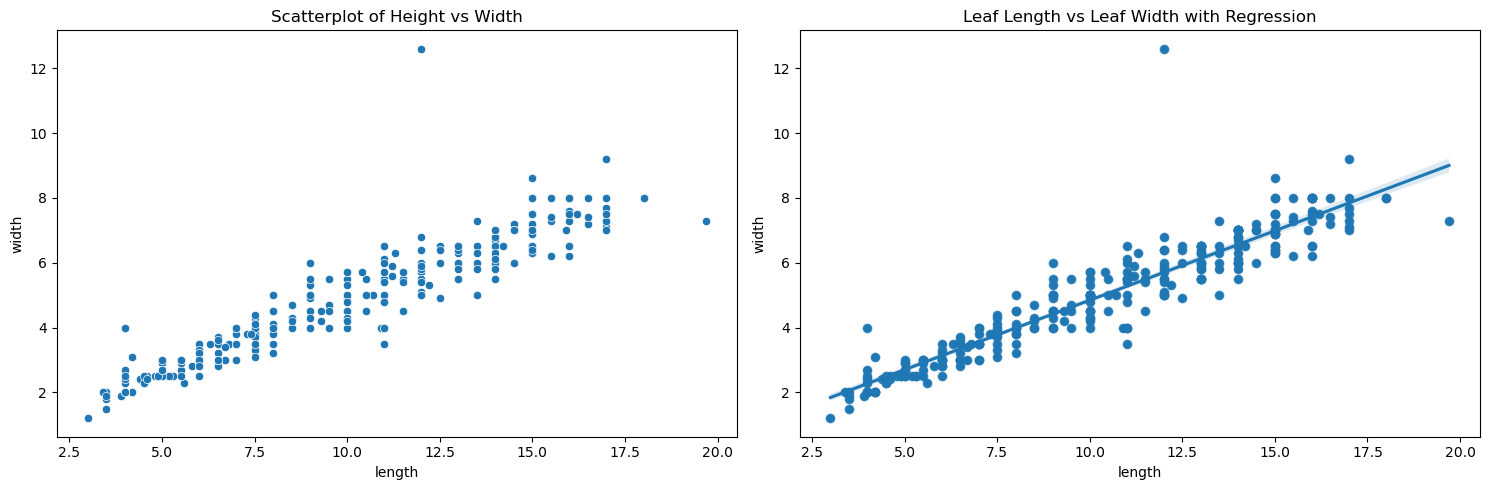

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatterplot on the first axis
sns.scatterplot(x='length', y='width', data=clean_data, ax=axes[0])
axes[0].set_title("Scatterplot of Height vs Width")

# Scatterplot with regression on the second axis
sns.scatterplot(x='length', y='width', data=clean_data, ax=axes[1])
sns.regplot(x='length', y='width', data=clean_data, ax=axes[1])
axes[1].set_title("Leaf Length vs Leaf Width with Regression")

plt.tight_layout()

From the diagram above, overtly stated in the diagram showing the regression line, it is evident that there is high correlation between the plants length and width. The high correlation between leaf length and width acts as an indicator to how the plants in study grows. Using the plot below, we can infer that whatever factor affects the leaf length also affects the width. Invariably, studying the effect of other factors(soil content or moisture) in relation to one of them can be used to approximate the other.

**Correlation Matrix**

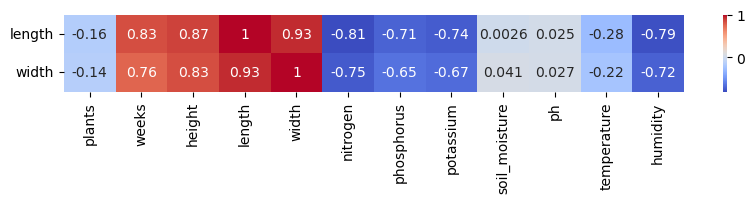

In [15]:
plt.figure(figsize=(10, 1))
correlation_matrix = clean_data.corr()
sns.heatmap(correlation_matrix.loc[['length', 'width'], :], annot=True, cmap="coolwarm");

This plot further asserts the claim made earlier about the relationship between the correlation between leaf lenghth and width as well as their relationship with other factors. Using this plot, we can see that 

In [17]:
clean_data.columns

Index(['plants', 'weeks', 'height', 'length', 'width', 'nitrogen',
       'phosphorus', 'potassium', 'soil_moisture', 'ph', 'temperature',
       'humidity'],
      dtype='object')

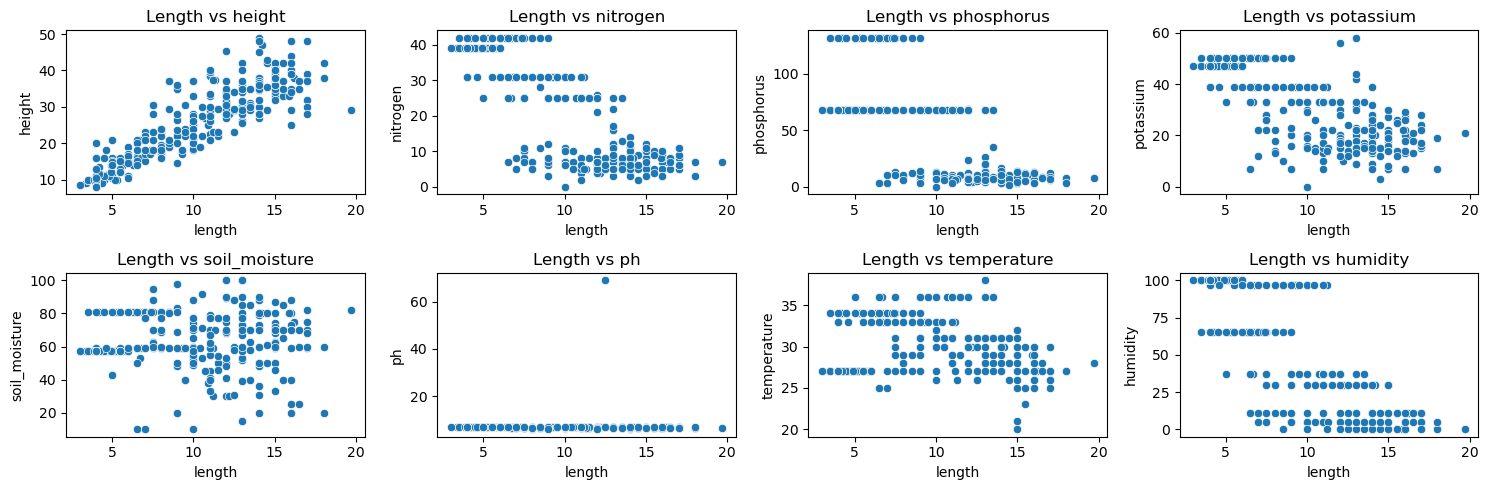

In [18]:
columns_to_plot = ['height', 'nitrogen', 'phosphorus', 'potassium', 'soil_moisture', 'ph', 'temperature', 'humidity']
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(2, num_plots//2, figsize=(15, 5))

axes = axes.flatten()
# Loop through columns and create scatterplots
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x= 'length', y=f"{col}", data=clean_data, ax=axes[i])
    axes[i].set_title(f'Length vs {col}')
    axes[i].set_xlabel('length')
    axes[i].set_ylabel(col)

plt.tight_layout()

**From the above plot, we deduce the following:**
1. There is a high correlation between length and the height of the plant. Which indicates uniform plant growth
2. There is no visible pattern to prove any relationship of how nitrogen, phosphours or potassium affects leaf length and width in the scatterplot but the correlation values between these features indicate a high relationship with plant growth (which affects the leaf length and width).
3. The negative values between the nutrients and the labels indicate that as the content of those nutrients in the soil increases beyond the maximum required quantity the plant growth begins to deteroriate. As high levels of these content can cause toxicity in plants and high soil acid levels.
4. The abscence of no visible pattern in the scatterplot indicates a non-linear relationship between those values. Visually, we cannot make much inferences.

## Feature Importance selection using statistical models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
clean_data[clean_data['temperature'].isna()]

,plants,weeks,height,length,width,nitrogen,phosphorus,potassium,soil_moisture,ph,temperature,humidity


In [23]:
X = clean_data.drop(['length', 'width'], axis=1)
y = clean_data['length']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 210 to 102
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   plants         232 non-null    category
 1   weeks          232 non-null    int64   
 2   height         232 non-null    float64 
 3   nitrogen       232 non-null    float64 
 4   phosphorus     232 non-null    float64 
 5   potassium      232 non-null    float64 
 6   soil_moisture  232 non-null    float64 
 7   ph             232 non-null    float64 
 8   temperature    232 non-null    float64 
 9   humidity       232 non-null    float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 19.7 KB


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
for idx, val in enumerate(zip(X.columns, model.coef_)):
    print(f"{idx+1}. Feature: {val[0]}, Coefficient: {val[1]}")
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

1. Feature: plants, Coefficient: -0.03469718172179114
2. Feature: weeks, Coefficient: 0.7033923144996782
3. Feature: height, Coefficient: 0.21145194440278978
4. Feature: nitrogen, Coefficient: -0.08492121525349865
5. Feature: phosphorus, Coefficient: 0.004508277168708774
6. Feature: potassium, Coefficient: 0.03868976819196798
7. Feature: soil_moisture, Coefficient: -0.0015718994252586493
8. Feature: ph, Coefficient: 0.05456013583652115
9. Feature: temperature, Coefficient: 0.06390845760261021
10. Feature: humidity, Coefficient: 0.018729750629433495
Intercept: -1.132098000677141
Mean Squared Error: 3.5264886759761835
R^2 Score: 0.7728147970557551


*From the multivariate linear regression model, we can see that the number of weeks the plant has stayed is the most predominant factor that affects the leaf length and width. The NPK content of the soil are the next set of significant factors, with little effect compared to the number of weeks.*